# El Conejo Malo as the Hub: A Network Analysis of Bad Bunny’s Collaborations

# Introduction

This report examines the collaboration network of **Bad Bunny** using the Spotify Global Charts dataset (2023 snapshot). The dataset contains tracks from a wide range of release years (1930–2023), but only includes songs that were streamed or charted enough to appear in 2023.  

To investigate the structure of Bad Bunny’s collaborations, a network analysis was conducted in which:  
- **Nodes** represent artists.  
- **Edges** represent collaborations on tracks that charted in 2023 (regardless of release year).  

Two centrality measures were calculated:  
- **Degree centrality**, which captures the number of direct collaborations.  
- **Eigenvector centrality**, which reflects the influence of an artist based on connections to other well-connected artists.  

Artists were then categorized by country of origin, enabling comparison of centrality measures across national groups.  


## Step 1: Load Spotify Dataset

We begin by importing the dataset, which contains track-level information such as song title, artist names, and streaming metrics.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt


#load data from excel file
spotifydata = pd.read_excel("../data/spotify2023.xlsx")

#inspect data
print(spotifydata.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


## Step 2: Build Collaboration Network

We filter the dataset for tracks that include Bad Bunny. When multiple artists appear on a track, we connect them to form edges in the network.


In [35]:
artist_name = "Bad Bunny"
bb_songs = spotifydata[spotifydata['artist(s)_name'].str.contains(artist_name, case=False, na=False)]
print(bb_songs)

                                            track_name  \
4                                       WHERE SHE GOES   
10                                           un x100to   
27                                        MOJABI GHOST   
87                                     Me Porto Bonito   
92                                         Coco Chanel   
192                                  Titi Me PreguntÔø   
217                                           La Jumpa   
239                                             Efecto   
291                                      Gato de Noche   
332                         Tormenta (feat. Bad Bunny)   
362                                           Neverita   
368                                        LA CANCIÔøΩ   
377                                        Moscow Mule   
422                                           Yonaguni   
490                                              Tarot   
494                                              Party   
528  Lo Siento

## Step 3: Centrality Measures

Degree centrality and eigenvector centrality were calculated for each artist in the Bad Bunny collaboration network.


In [36]:
import networkx as nx
from itertools import combinations



# Filter tracks where Bad Bunny appears
bb_songs = spotifydata[spotifydata["artist(s)_name"].str.contains(artist_name, case=False, na=False)]

spotifydata["artist(s)_name"] = spotifydata["artist(s)_name"].str.replace("The MarÔøΩÔ", "The Marías", regex=False)

# Build graph
G = nx.Graph()

for _, row in bb_songs.iterrows():
    # split all artists on commas
    artists = [a.strip() for a in row["artist(s)_name"].split(",")]
    
    # make edges between all pairs (not just Bad Bunny → others)
    if len(artists) > 1:
        for a1, a2 in combinations(artists, 2):
            if G.has_edge(a1, a2):
                G[a1][a2]["weight"] += 1
            else:
                G.add_edge(a1, a2, weight=1)


print("Total collaborators:", len(G.nodes))
print(list(G.nodes))



Total collaborators: 20
['Bad Bunny', 'Grupo Frontera', 'Tainy', 'Chencho Corleone', 'Eladio Carrion', 'Arcangel', 'Nengo Flow', 'Gorillaz', 'J Balvin', 'Jhay Cortez', 'Rauw Alejandro', 'Julieta Venegas', 'Aventura', 'Sech', 'Mora', 'Nio Garcia', 'Daddy Yankee', 'Tony Dize', 'Buscabulla', 'The MarÔøΩÔ']


## Step 4: Add Country Categories 
The dataset did not provide categorical attributes for artists, countries of origin were manually assigned to collaborators.

In [37]:
artists_info = {
    "Bad Bunny": "Puerto Rico",
    "Grupo Frontera": "Mexico",
    "Buscabulla": "Puerto Rico",
    "Tony Dize": "Puerto Rico",
    "Daddy Yankee": "Puerto Rico",
    "Nio Garcia": "Puerto Rico",
    "Mora": "Puerto Rico",
    "Sech": "Panama",
    "Aventura": "Dominican Republic",
    "Julieta Venegas": "Mexico",
    "Rauw Alejandro": "Puerto Rico",
    "Jhay Cortez": "Puerto Rico",
    "J Balvin": "Colombia",
    "Gorillaz": "UK",
    "Nengo Flow": "Puerto Rico",
    "Arcangel": "Puerto Rico",
    "Eladio Carrion": "Puerto Rico",
    "Chencho Corleone": "Puerto Rico",
    "Tainy": "Puerto Rico",
    "The Marías": "Puerto Rico/US"
}

centrality_df["country"] = centrality_df["artist"].map(artists_info)
centrality_df




,artist,degree,eigenvector,country
0,Bad Bunny,1.000000,0.689287,Puerto Rico
1,Grupo Frontera,0.052632,0.151535,Mexico
2,Tainy,0.105263,0.194236,Puerto Rico
3,Chencho Corleone,0.052632,0.151535,Puerto Rico
4,Eladio Carrion,0.052632,0.151535,Puerto Rico
5,Arcangel,0.052632,0.151535,Puerto Rico
6,Nengo Flow,0.052632,0.151535,Puerto Rico
7,Gorillaz,0.052632,0.151535,UK
8,J Balvin,0.105263,0.194236,Colombia
9,Jhay Cortez,0.052632,0.151535,Puerto Rico


## Step 5: Compare Across Countries
Centrality measures were grouped by country to compare patterns of collaboration across national categories.

In [38]:
summary = centrality_df.groupby("country")[["degree", "eigenvector"]].mean()
summary


,degree,eigenvector
country,,
Colombia,0.105263,0.194236
Dominican Republic,0.052632,0.151535
Mexico,0.078947,0.172886
Panama,0.105263,0.194236
Puerto Rico,0.137652,0.202755
Puerto Rico/US,0.052632,0.151535
UK,0.052632,0.151535


# Results & Interpretation

The centrality analysis confirms that **Bad Bunny** functions as the hub 
of the collaboration network, with maximum degree centrality (1.0) and the 
highest eigenvector centrality (0.689). This indicates that he connects to 
every other artist and occupies the most influential position in the graph.  

When comparing collaborators across countries, differences emerge:  

- **Puerto Rico** contributes the majority of collaborators and shows the 
  highest average degree (0.138) and eigenvector centrality (0.203). This 
  reflects the central role of Puerto Rican artists such as Rauw Alejandro, 
  Daddy Yankee, Arcangel, and Tainy in the reggaeton and Latin trap network.  
- **Colombia (J Balvin)** and **Panama (Sech)** each display relatively high 
  centrality values (degree = 0.105, eigenvector = 0.194), suggesting that 
  although they are fewer in number, their collaborations are influential.  
- **Mexico** (Grupo Frontera, Julieta Venegas) holds moderate average scores 
  (degree = 0.079, eigenvector = 0.173), representing notable partnerships.  
- **Dominican Republic (Aventura)**, **Puerto Rico/US (The Marías)**, and 
  **UK (Gorillaz)** display the lowest averages, reflecting fewer or more 
  peripheral collaborations.  

Overall, Puerto Rico anchors the network both in size and influence, while 
Colombian, Mexican, and Panamanian collaborators highlight important cross-regional 
partnerships. International acts such as Gorillaz and The Marías demonstrate 
Bad Bunny’s crossover into global and alternative markets, extending his reach 
beyond the core reggaeton community.


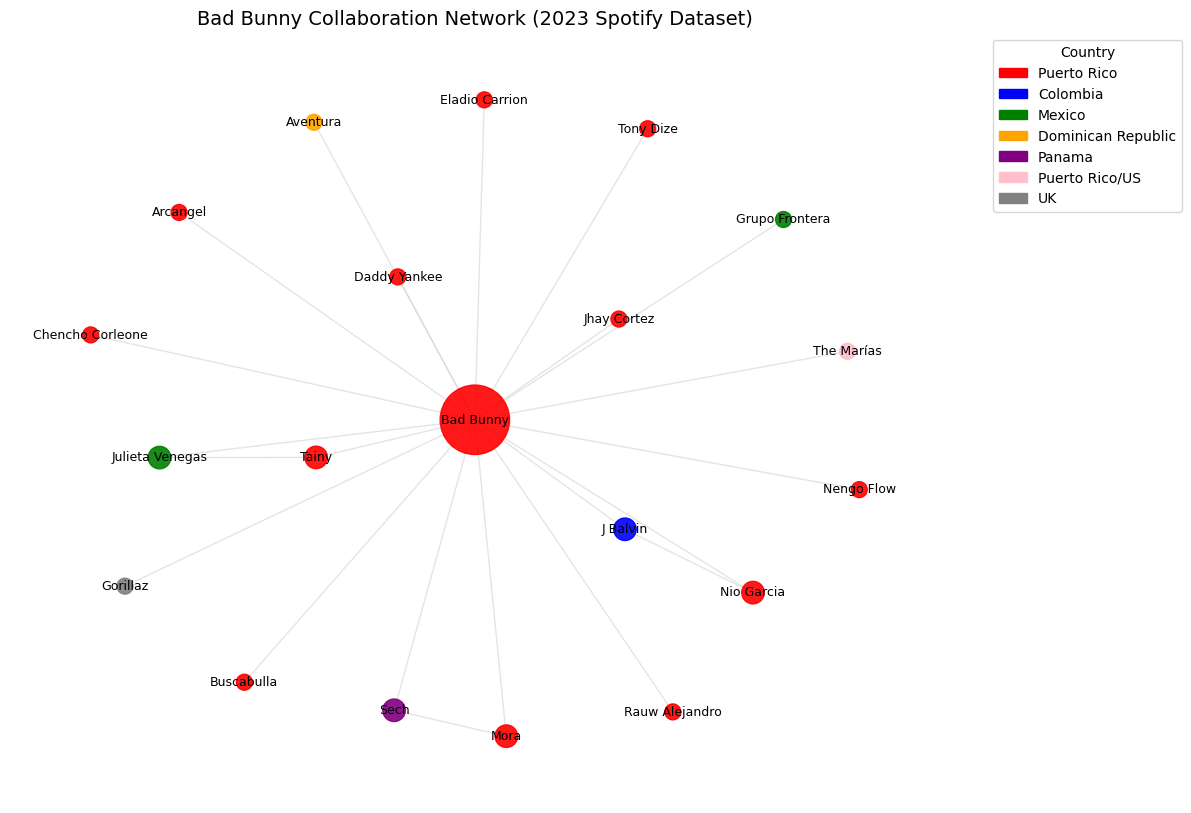

In [43]:
# fix garbled name in graph
alias_map = {"The MarÔøΩÔ": "The Marías", "The MarÃ­as": "The Marías"}
G = nx.relabel_nodes(G, alias_map, copy=True)

# also fix in centrality_df if not already
centrality_df["artist"] = centrality_df["artist"].replace(alias_map)

deg_cent = nx.degree_centrality(G)
eig_cent = nx.eigenvector_centrality(G)

plt.figure(figsize=(12, 10))

# layout
pos = nx.spring_layout(G, seed=42)

# make sure each node has a country attribute
for n in G.nodes:
    G.nodes[n]["country"] = latin_info.get(n, "Unknown")

# build colors
node_colors = [country_colors[G.nodes[n]["country"]] for n in G.nodes]

# node sizes scaled by degree centrality
node_sizes = [deg_cent[n] * 2500 for n in G.nodes]

# draw nodes & edges
nx.draw_networkx_edges(G, pos, edge_color="lightgray", alpha=0.6)
nx.draw_networkx_nodes(G, pos,
                       node_color=node_colors,
                       node_size=node_sizes,
                       alpha=0.9)

# draw labels
nx.draw_networkx_labels(G, pos,
                        font_size=9,
                        font_color="black")

# add legend manually
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=color, label=country) for country, color in country_colors.items()]
plt.legend(handles=handles, title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.title("Bad Bunny Collaboration Network (2023 Spotify Dataset)", fontsize=14)
plt.axis("off")
plt.show()
